In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

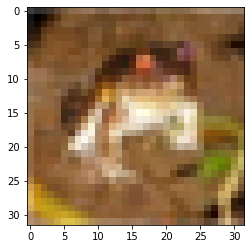

In [3]:
img = plt.imshow(x_train[0])

In [4]:
y_train[0]

array([6], dtype=uint8)

In [5]:
y_train_one_hot = keras.utils.to_categorical(y_train, 10)
y_test_one_hot = keras.utils.to_categorical(y_test, 10)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

## Setting up the Architecture

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [17]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [18]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [21]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=40, 
           validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/40





40000/40000 [==============================] - 347s 9ms/step - loss: 1.5882 - acc: 0.4201 - val_loss: 1.2518 - val_acc: 0.5493
Epoch 2/40
40000/40000 [==============================] - 162s 4ms/step - loss: 1.1604 - acc: 0.5852 - val_loss: 0.9627 - val_acc: 0.6593
Epoch 3/40
40000/40000 [==============================] - 147s 4ms/step - loss: 1.0003 - acc: 0.6457 - val_loss: 0.8822 - val_acc: 0.6861
Epoch 4/40
40000/40000 [==============================] - 146s 4ms/step - loss: 0.8983 - acc: 0.6857 - val_loss: 0.8026 - val_acc: 0.7133
Epoch 5/40
40000/40000 [==============================] - 145s 4ms/step - loss: 0.8123 - acc: 0.7138 - val_loss: 0.7476 - val_acc: 0.7405
Epoch 6/40
40000/40000 [==============================] - 145s 4ms/step - loss: 0.7625 - acc: 0.7350 - val_loss: 0.7184 - val_acc: 0.7469
Epoch 7/40
40000/400

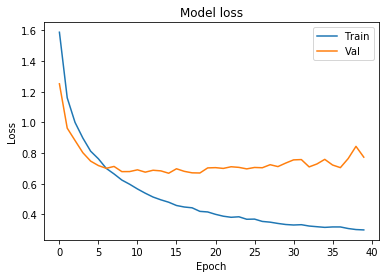

In [22]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

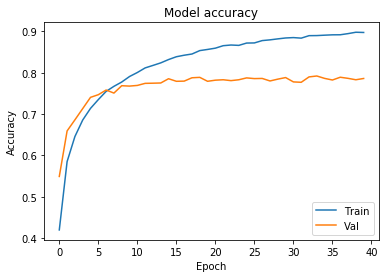

In [23]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [24]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 13s 1ms/step


0.7813

In [25]:
model.save('my_cifar10_model.h5')

In [13]:
from keras.models import load_model
model = load_model('my_cifar10_model.h5')







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




## Testing out with your own images

In [26]:
my_image = plt.imread("cat.jpg")

In [27]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

In [28]:
my_image_resized

array([[[0.72647059, 0.72647059, 0.75784314],
        [0.67622549, 0.6814951 , 0.71286765],
        [0.64693627, 0.65870098, 0.6939951 ],
        ...,
        [0.44571078, 0.47316176, 0.49669118],
        [0.45747549, 0.48597963, 0.51151961],
        [0.46139706, 0.49669118, 0.52414216]],

       [[0.71213235, 0.71213235, 0.7435049 ],
        [0.66580882, 0.67056143, 0.70492877],
        [0.64313343, 0.65489813, 0.69019225],
        ...,
        [0.41960784, 0.44705882, 0.47058824],
        [0.43137255, 0.45882353, 0.48235294],
        [0.43529412, 0.46892233, 0.49411765]],

       [[0.69710095, 0.69710095, 0.7284735 ],
        [0.65404412, 0.65820695, 0.69105775],
        [0.63529412, 0.64705882, 0.68226486],
        ...,
        [0.41164216, 0.43909314, 0.46262255],
        [0.42046952, 0.45036382, 0.4745098 ],
        [0.42352941, 0.45490196, 0.48235294]],

       ...,

       [[0.72156863, 0.70980392, 0.69019608],
        [0.71764706, 0.70980392, 0.69019608],
        [0.70588235, 0

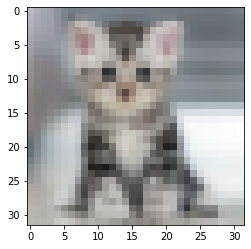

In [29]:
img = plt.imshow(my_image_resized)

In [30]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [31]:
probabilities.max()

0.74794245

In [32]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: dog -- Probability: 0.74794245
Second most likely class: cat -- Probability: 0.23166004
Third most likely class: frog -- Probability: 0.010389456
Fourth most likely class: horse -- Probability: 0.0062480234
Fifth most likely class: deer -- Probability: 0.0034419491
